<a href="https://colab.research.google.com/github/Randy1702/hi/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving credit_card_fraud_100_members.csv to credit_card_fraud_100_members.csv
Data loaded successfully.


<ipython-input-6-bf95506b1f3d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TransactionAmount'] = scaler.fit_transform(X[['TransactionAmount']])


Accuracy: 0.55
ROC AUC: 0.38
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.60      0.30      0.40        10

    accuracy                           0.55        20
   macro avg       0.57      0.55      0.52        20
weighted avg       0.57      0.55      0.52        20



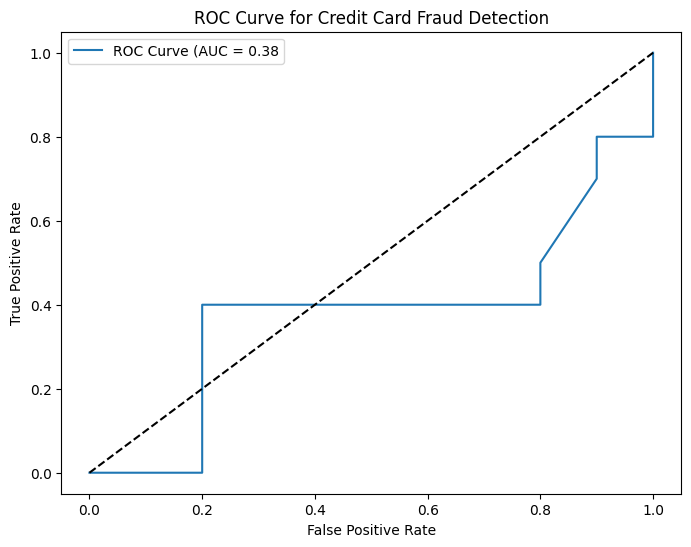

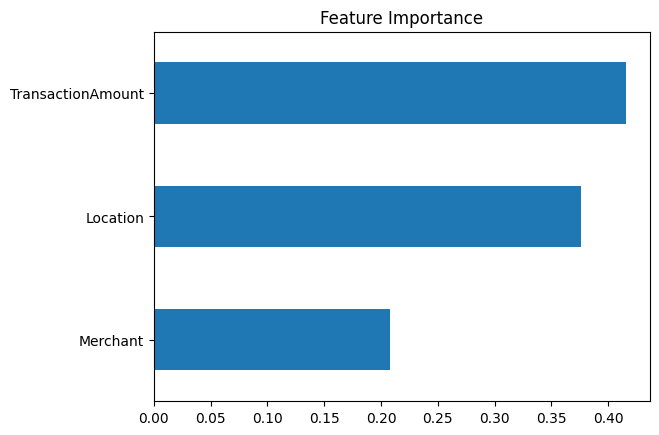

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from google.colab import files
uploaded = files.upload()


# Load the CSV file
df = pd.read_csv('credit_card_fraud_100_members.csv')
print("Data loaded successfully.")

# Encode categorical columns
le_merchant = LabelEncoder()
df['Merchant'] = le_merchant.fit_transform(df['Merchant'])

le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# Prepare features and target
X = df[['TransactionAmount', 'Merchant', 'Location']]
y = df['IsFraud']

# Scale numerical features
scaler = StandardScaler()
X['TransactionAmount'] = scaler.fit_transform(X[['TransactionAmount']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Classification Report:")
print(report)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Card Fraud Detection')
plt.legend()
plt.show()

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()